In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#pd.read_csv(r'../Temp_States.csv')
cdd_data = pd.read_csv(r'C:/Users/tusha/dataV2-labs/module-2/Explore Correlations/CDD.csv', sep='\t')

In [3]:
cdd_data

EVENT CATEGORY EVENT GROUP                 EVENT SUBGROUP  \
0          Disaster     Natural  Meteorological - Hydrological   
1          Disaster     Natural  Meteorological - Hydrological   
2          Disaster     Natural  Meteorological - Hydrological   
3          Disaster     Natural                     Biological   
4          Incident  Technology            Hazardous Chemicals   
...             ...         ...                            ...   
1084       Disaster     Natural  Meteorological - Hydrological   
1085       Incident  Technology                      Explosion   
1086       Incident  Technology                      Explosion   
1087       Incident  Technology         Infrastructure failure   
1088       Incident  Technology                           Fire   

                       EVENT TYPE                                 PLACE  \
0     Storm - Unspecified / Other                   Christmas Island NS   
1                    Winter Storm  Nova Scotia and Prince Edward Island   
2                           Flood             Red Earth First Nation SK   
3                        Epidemic              Alberta and Saskatchewan   
4            Leak / Spill Release                   Seaforth Channel BC   
...                           ...                                   ...   
1084                        Flood             Saint John River Basin NB   
1085              Non-Residential                          Cranberry BC   
1086              Non-Residential                        Grand Forks BC   
1087     Manufacturing / Industry                         Wellington BC   
1088              Non-Residential                 Ottawa ON and Hull QC   

            EVENT START DATE  \
0     25/12/2016 12:00:00 AM   
1     27/11/2016 12:00:00 AM   
2     14/11/2016 12:00:00 AM   
3     26/10/2016 12:00:00 AM   
4     13/10/2016 12:00:00 AM   
...                      ...   
1084  01/03/1902 12:00:00 AM   
1085  01/01/1902 12:00:00 AM   
1086  01/01/1901 12:00:00 AM   
1087  01/01/1901 12:00:00 AM   
1088  26/04/1900 12:00:00 AM   

                                               COMMENTS  FATALITIES  \
0     Christmas Island NS, December 25, 2016. Reside...         NaN   
1     Nova Scotia and Prince Edward Island, November...         NaN   
2     Red Earth First Nation SK, July 14-18, 2016. H...         NaN   
3     Alberta and Saskatchewan, October 26 to Decemb...         NaN   
4     Seaforth Channel BC, October 13, 2016. The art...         NaN   
...                                                 ...         ...   
1084  Saint John River Basin NB, March 1902. An unus...         2.0   
1085  Cranberry BC, 1902. An explosion in the Extens...        32.0   
1086  Grand Forks BC, 1901. An explosion in the Unio...        64.0   
1087  Wellington BC, 1901. Sixteen people were entom...        16.0   
1088  Ottawa ON and Hull QC, April 26, 1900.  A smal...         7.0   

      INJURED / INFECTED  EVACUATED  ...          EVENT END DATE  \
0                    NaN        NaN  ...  25/12/2016 12:00:00 AM   
1                    NaN        NaN  ...  29/11/2016 12:00:00 AM   
2                    NaN      576.0  ...  18/11/2016 12:00:00 AM   
3                    NaN        NaN  ...  21/12/2016 12:00:00 AM   
4                    NaN        NaN  ...  13/10/2016 12:00:00 AM   
...                  ...        ...  ...                     ...   
1084                 0.0        0.0  ...  01/03/1902 12:00:00 AM   
1085                 0.0        0.0  ...  01/01/1902 12:00:00 AM   
1086                 0.0        0.0  ...  01/01/1901 12:00:00 AM   
1087                 0.0        0.0  ...  01/01/1901 12:00:00 AM   
1088                 0.0    15000.0  ...  26/04/1900 12:00:00 AM   

      FEDERAL DFAA PAYMENTS PROVINCIAL DFAA PAYMENTS  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                16700000.0     

In [4]:
#cdd_data.corr()
cdd_data.corr().style.background_gradient(cmap='coolwarm')

In [5]:
cdd_data['INJURED / INFECTED'].corr(cdd_data['MUNICIPAL COSTS'])
# positively coorelated: More the number of injured people will cause an effect on the costs on the munucipality


0.9652859446245872

In [6]:
#one for which the correlation is almost zero.
cdd_data['EVACUATED'].corr(cdd_data['PROVINCIAL DFAA PAYMENTS'])
# Number of evacuated people less or more will not to effect the DFAA payments as payments havde to be done in case of a disaster
#and it should not be effected by the number of evacuated people.

0.0836917705825122

In [7]:
cdd_data['UTILITY - PEOPLE AFFECTED'].corr(cdd_data['OGD COSTS'])
# both paramenters have little or no effect on each other with their respective increase or decrease.


-0.09298259907022133

In [8]:
import seaborn as sns
%matplotlib inline

(14.5, -0.5)

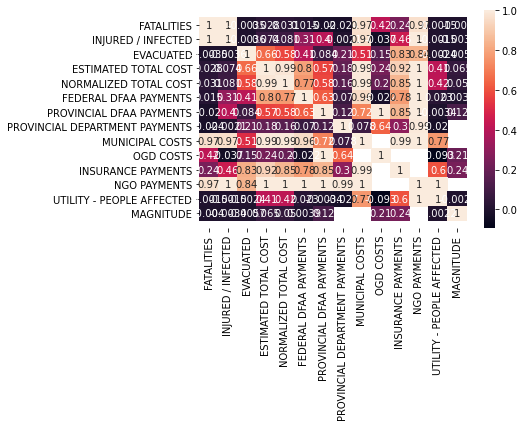

In [9]:
ax = sns.heatmap(cdd_data.corr(), annot=True) #notation: "annot" not "annotate"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [10]:
#Look up the pairplot function in Seaborn. Use it to plot the pairwise relations between the six columns you selected. Does what you see confirm your ideas? Describe in a comment.

In [11]:
#df = seaborn.load_dataset('tips')

#seaborn.pairplot(df, hue ='abcd')
#sns.pairplot(cdd_data, hue = 'INJURED / INFECTED')

In [12]:
#plt.show()

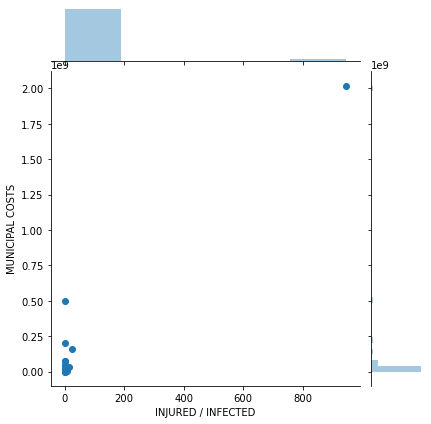

In [31]:
sns.jointplot('INJURED / INFECTED','MUNICIPAL COSTS', data= cdd_data)
# found the above alternative to print a plot to compare the parameters

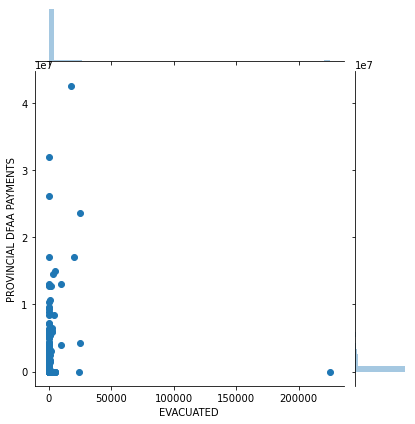

In [29]:
sns.jointplot('EVACUATED','PROVINCIAL DFAA PAYMENTS', data= cdd_data)

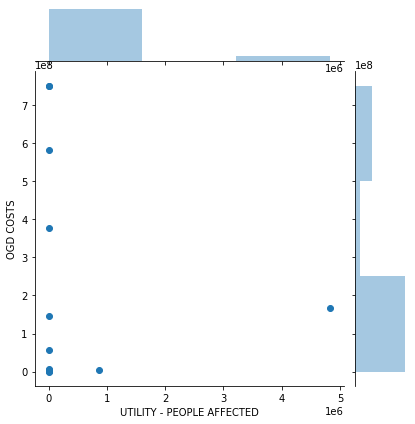

In [16]:
sns.jointplot('UTILITY - PEOPLE AFFECTED','OGD COSTS', data= cdd_data)

In [17]:
#g = sns.pairplot(cdd_data,hue="INJURED / INFECTED")

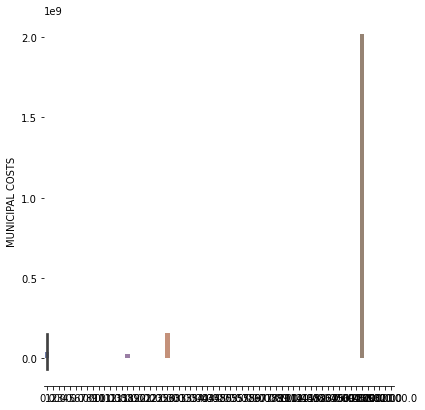

In [27]:
#method 2, tried a few plot types but none seem to display the data clearly as of now


#sns.jointplot('INJURED / INFECTED','MUNICIPAL COSTS', data= cdd_data)

# Draw a nested barplot
g = sns.catplot(data=cdd_data, kind="bar",x="INJURED / INFECTED", y="MUNICIPAL COSTS",ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "MUNICIPAL COSTS")
#g.legend.set_title("")


